# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [125]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

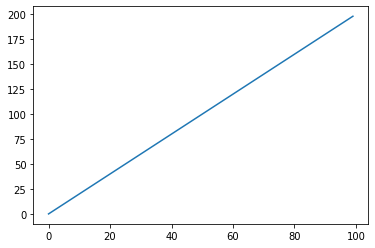

In [3]:
plt.plot(x, y)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

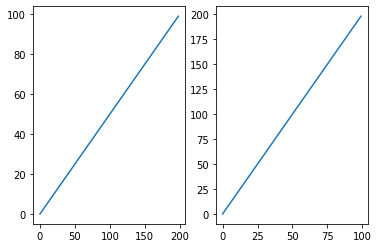

In [4]:
#now subploting y and x 
fig, axs = plt.subplots(1,2)
axs[0].plot(y,x)
axs[1].plot(x,y)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 1.0, 'Another Plot')

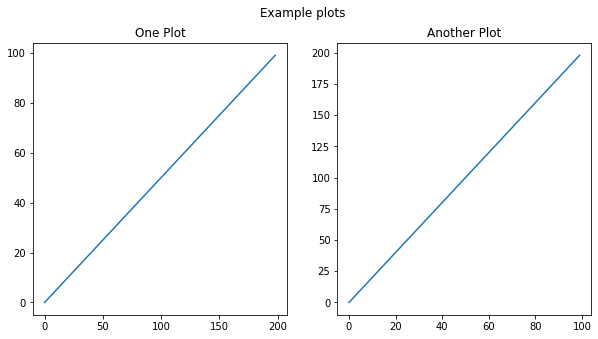

In [5]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Example plots")
axs[0].plot(y,x)
axs[1].plot(x,y)
axs[0].set_title("One Plot")
axs[1].set_title("Another Plot")


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [6]:
# I don't know what this means

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv("fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [10]:
fitbit.Months_encoded.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

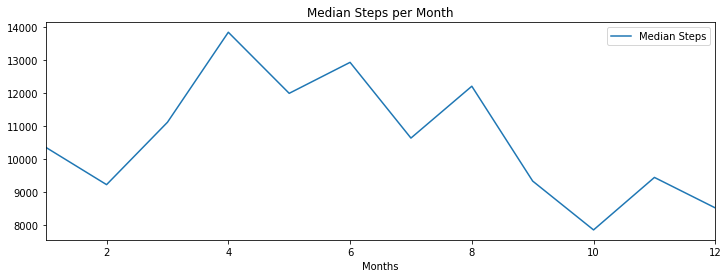

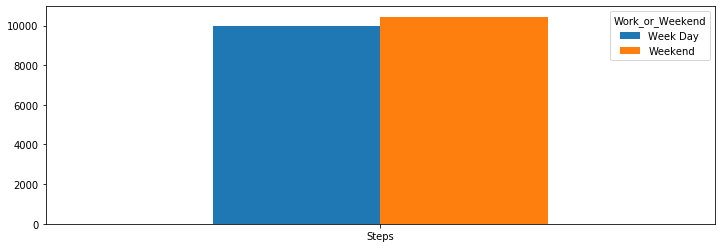

In [126]:
# MEDIAN STEPS BY MONTH_ENCODED
steps_per_month = fitbit.groupby(["Months_encoded"]).agg({"Steps":"median"})
steps_per_month = steps_per_month.rename(columns={"Steps": "Median Steps"})

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

#creating new dataframe, transposing and assigning new names
work_weekend_median = fitbit.groupby(["Work_or_Weekend"]).agg({"Steps":"median"})
work_weekend_median = work_weekend_median.transpose()
work_weekend_median = work_weekend_median.rename(columns={0:"Week Day", 1:"Weekend"})

#median steps per month graph

steps_per_month.plot(figsize=(12,4))
plt.title("Median Steps per Month")
plt.xlabel("Months")

work_weekend_median.plot.bar(figsize=(12,4))
plt.xticks(rotation = 0)

plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

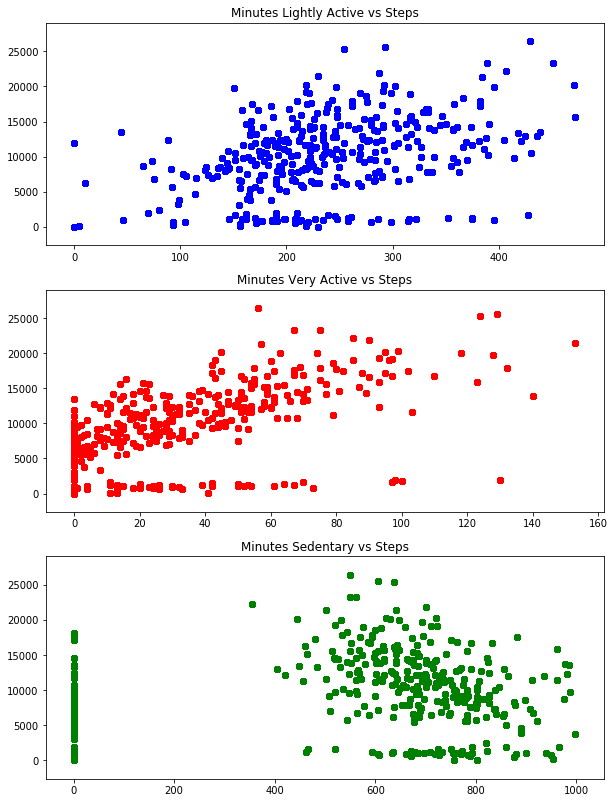

In [147]:
fig, ax = plt.subplots(3,1, figsize=(10,5))
for column in fitbit:
    ax[0].scatter(fitbit["Minutes Lightly Active"], fitbit["Steps"], color="blue")
    ax[1].scatter(fitbit["Minutes Very Active"],fitbit["Steps"], color= "red")
    ax[2].scatter(fitbit["Minutes Sedentary"],fitbit["Steps"], color="green")
    ax[0].set_title("Minutes Lightly Active vs Steps")
    ax[1].set_title("Minutes Very Active vs Steps")
    ax[2].set_title("Minutes Sedentary vs Steps")

#fix distance between plots   
plt.subplots_adjust(top= 3, bottom = 0.9)
    
plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
titanic = pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [16]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [149]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include = np.number).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [151]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude = np.number).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [152]:
#setting style to classic 
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')


#### Use the right visulalization to show the distribution of column `Age`.

<Figure size 800x480 with 0 Axes>

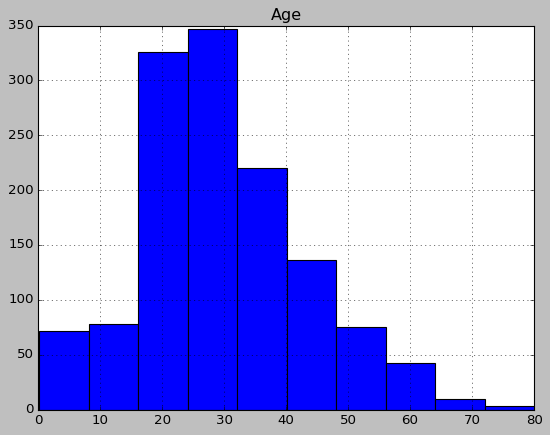

In [178]:
plt.figure(figsize=[10,6])
titanic.hist("Age")

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

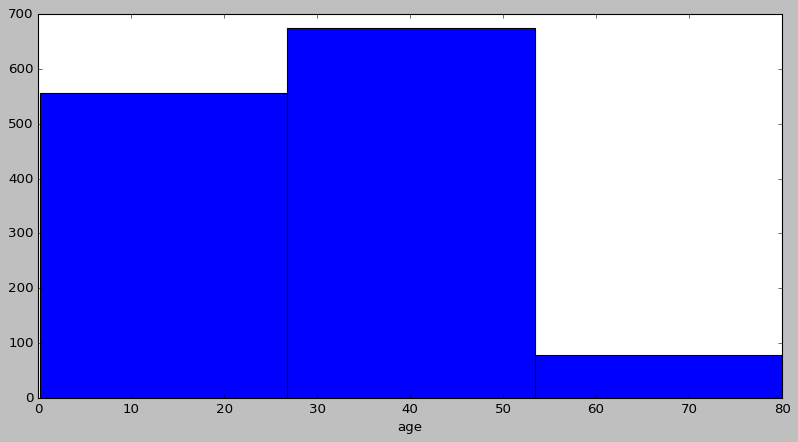

In [194]:
fig, axs = plt.subplots(1,1, figsize= (12,6))

age = titanic["Age"]

#bins for the intervals 10, 20, 50 --- not sure if this is right?
plt.hist(age, bins=3)
plt.xlabel("age")


plt.show()


#### How does the bin size affect your plot?

In [22]:
"""
The distribution is more concentrated
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

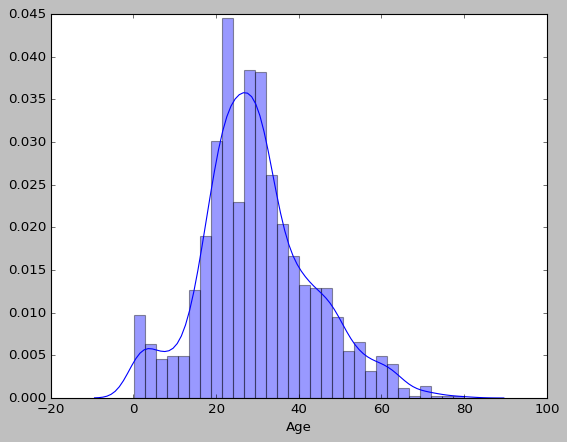

In [199]:
import seaborn as sns
sns.distplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

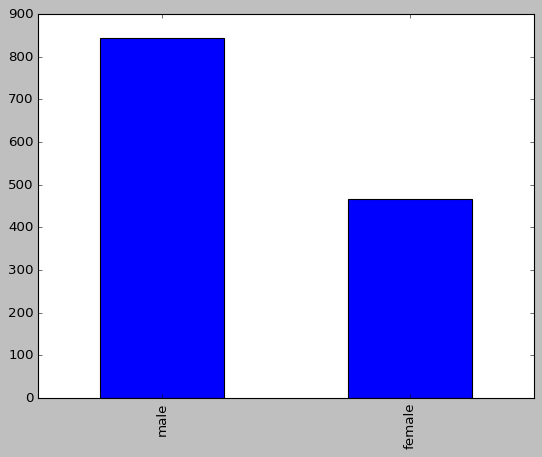

In [205]:
# Method 1 - matplotlib
# your code here
titanic["Gender"].value_counts().plot.bar()

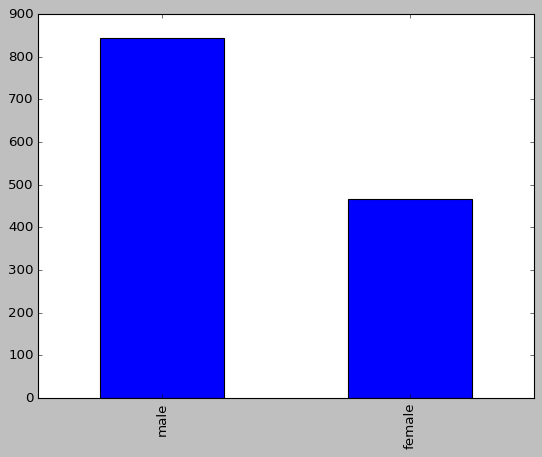

In [200]:
# Method 2 - seaborn
titanic["Gender"].value_counts().plot.bar()

#### Use the right plot to visualize the column `Pclass`.

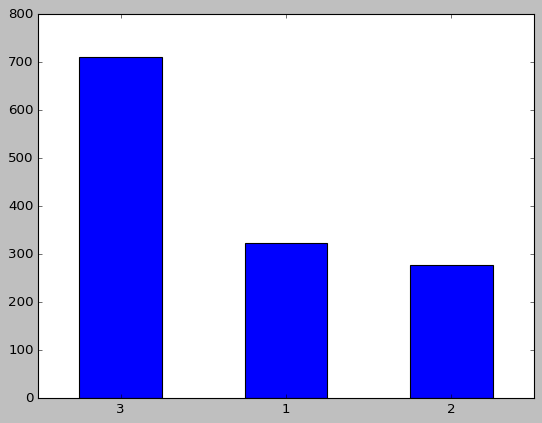

In [212]:
# your code here
titanic["Pclass"].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

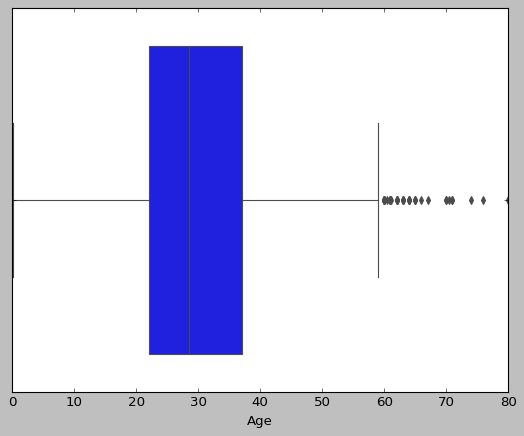

In [214]:

sns.boxplot(titanic["Age"])


In [28]:
"""
The boxplot shows us the median, quartiles and outliers
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [29]:
"""
The median age was around 29
Very few people were over 60 (outliers)
50% of the passagengers were betweem 20 and 38
25& were younger than 20 
25% were older than 40
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

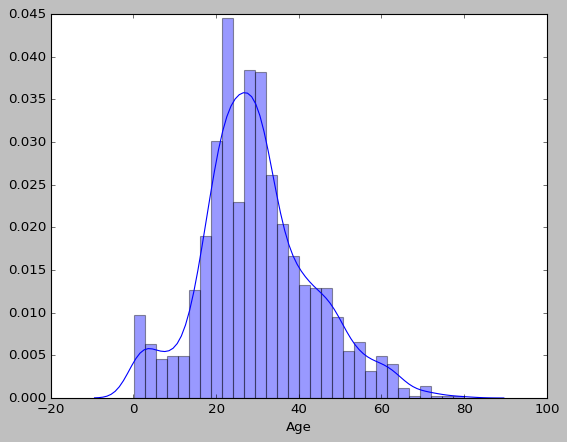

In [218]:
sns.distplot(titanic["Age"])

#### What additional information does the last plot provide about feature `Age`?

In [31]:
"""
I wasn't able to add a distribution line to a boxplot, but I believe the 
above graph also helps to understand the age distribution
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

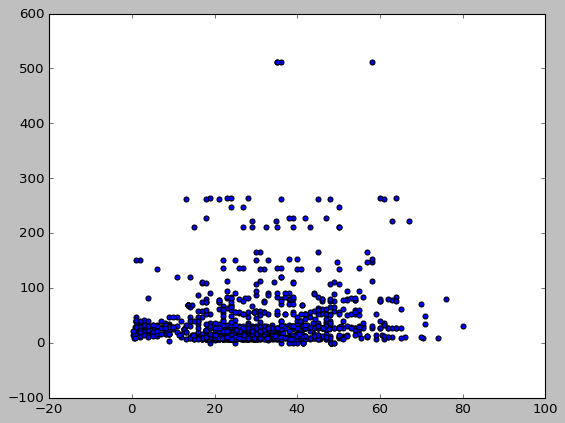

In [220]:
# Method 1 - matplotlib
plt.scatter(x= titanic["Age"],y = titanic["Fare"] )
plt.show()

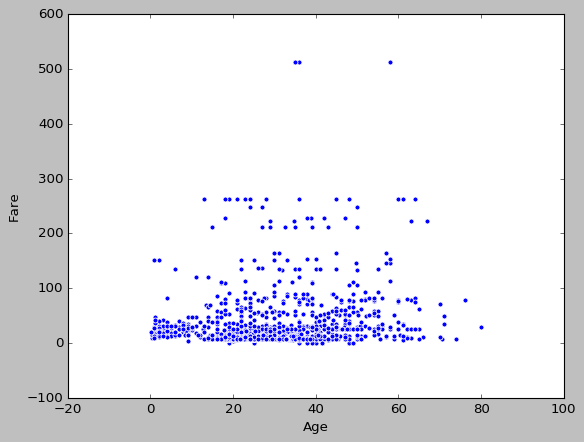

In [221]:
# Method 2 - seaborn
sns.scatterplot(x= titanic["Age"],y = titanic["Fare"])

#### Plot the correlation matrix using seaborn.

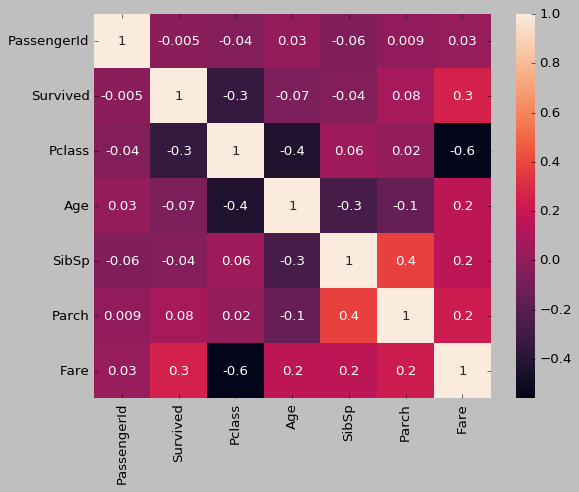

In [233]:
sns.heatmap(titanic.corr(), annot = True, fmt=".1g")

# heatmapp top and bottom were cut off, solution here : https://github.com/mwaskom/seaborn/issues/1773

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


#### What are the most correlated features?

In [35]:
"""
The fare and surviving rate

"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

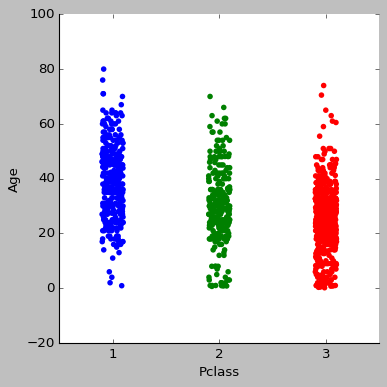

In [249]:
sns.catplot(x="Pclass", y="Age", data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

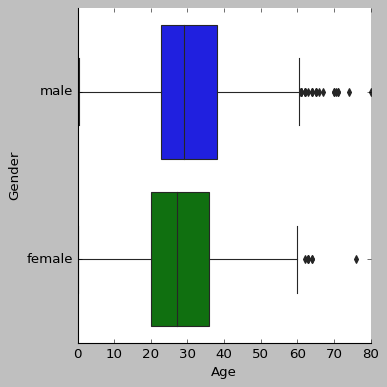

In [245]:
sns.catplot(x="Age", y="Gender", data = titanic, kind = "box")